In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [7]:
GND12Mor = candels[-12]

delz = GND12Mor[0]
nearby = GND12Mor[1][1]
host = GND12Mor[1][2]
lc = GND12Mor[1][3]

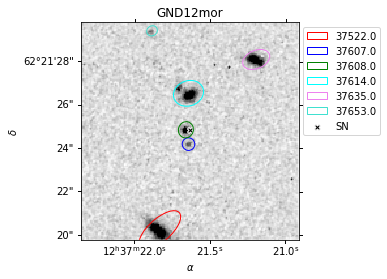

In [12]:
nick = GND12Mor[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND12Mor[1][0]['RA'],GND12Mor[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.016,val_max = .0525 )

In [11]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

  id    z     z_spec z_peak  l95   u95 
----- ------ ------- ------ ----- -----
37522 0.9500 -1.0000 0.9463 0.846 1.024
37607 1.6900 -1.0000 1.6912 1.191 2.338
37608 0.0500 -1.0000 0.0459 0.012 0.109
37614 0.3500 -1.0000 0.3464 0.227 0.550
37635 2.5800 -1.0000 2.5797 0.054 2.735
37653 2.4900 -1.0000 2.4934 2.537 2.916


## Dont see this SN published anywhere

## Evernote agrees most likely host is the coincident object however my photz for the object disagrees badly w/ that in evernote. The uncertainties were large for photz never got useful spectra from what I can tell in evernote.

## 37608 ~ photz ~ 0.05 = [.012,0.11]; evernote ~ 1.12 = [.41,3.23]

## Should check to see if ever came to conclusion on classification & if the photz being low redshift could make sense.